# Model building

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import time
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import statsmodels.api as sm
from statsmodels.api import add_constant
from scipy import stats
from scipy.stats import norm

In [3]:
#finalData.to_csv('finalData.csv', index=False)

finalData = pd.read_csv("finalData.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
X = finalData.drop(['salePrice_b','paymentCash_b',  'AVM_pris_d'], axis = 1)
y = finalData['salePrice_b']

X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)


In [5]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

pipe = pipe.fit(X_train, y_train)


In [6]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

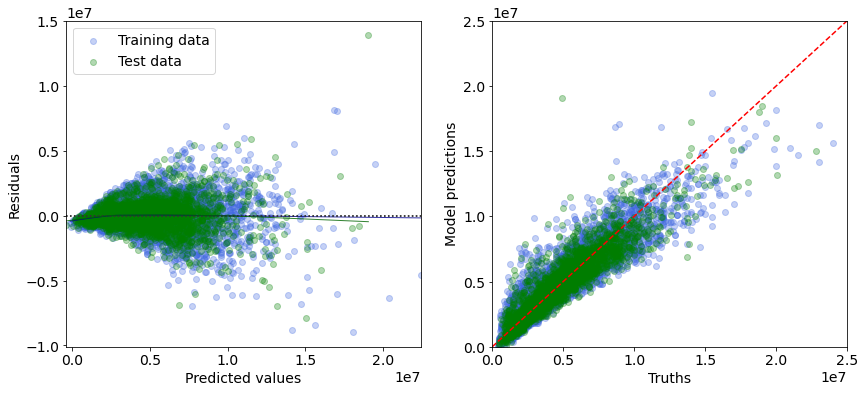

In [14]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)
sns.residplot(x=y_train_pred, y=y_train_pred - y_train, lowess=True, color = 'royalblue', 
                              scatter_kws={'alpha': 0.3}, 
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8}, label='Training data')
sns.residplot(x=y_test_pred, y=y_test_pred - y_test, color = 'green', 
                              scatter_kws={'alpha': 0.3}, lowess=True,
                              line_kws={'color': 'darkgreen', 'lw': 1, 'alpha': 0.8}, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

ax = plt.subplot(1,2,2)
plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 25000000])
plt.ylim([0, 25000000])

plt.show()

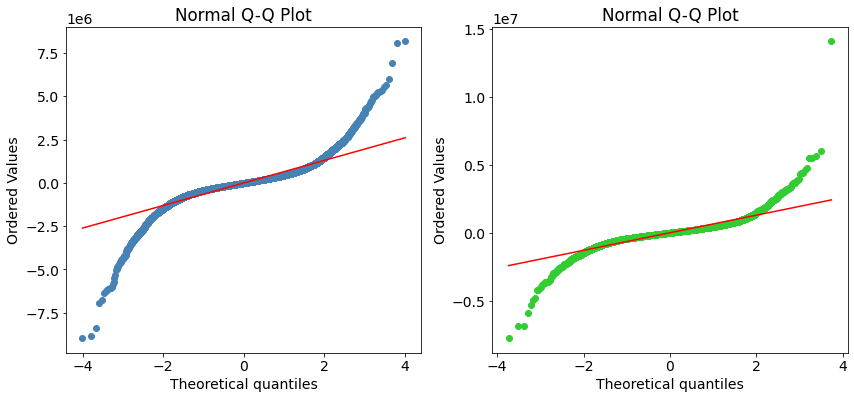

In [13]:
residuals1 = y_train_pred - y_train
residuals2 = y_test_pred - y_test

plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

stats.probplot(residuals1, dist=norm, plot=plt, fit=True)
ax.get_lines()[0].set_markerfacecolor('steelblue')
ax.get_lines()[0].set_markeredgecolor('steelblue')
plt.title("Normal Q-Q Plot")

ax = plt.subplot(1,2,2)

stats.probplot(residuals2, dist=norm, plot=plt, fit=True)
ax.get_lines()[0].set_markerfacecolor('limegreen')
ax.get_lines()[0].set_markeredgecolor('limegreen')
plt.title("Normal Q-Q Plot")
plt.show()

In [15]:
finalDataLog = finalData.copy()

finalDataLog['log_salePrice_b']=np.log(finalDataLog['salePrice_b']) # this is the natural log (ln)


#https://scikit-learn.org/stable/auto_examples/inspection/
#    plot_linear_model_coefficient_interpretation.html#the-problem-of-correlated-variables

0.12724579050858775
-0.015092050016638492


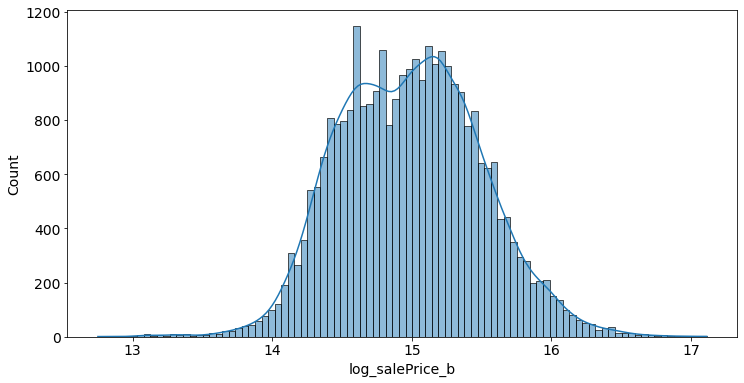

In [16]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
sns.histplot(data=finalDataLog, x='log_salePrice_b', kde=True)
print(finalDataLog['log_salePrice_b'].skew())
print(finalDataLog['log_salePrice_b'].kurt())

In [64]:
X = finalDataLog.drop(['salePrice_b', 'log_salePrice_b', 'paymentCash_b',  'AVM_pris_d'], axis = 1)
y = finalDataLog['log_salePrice_b']


X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)


In [65]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

pipe = pipe.fit(X_train, y_train)


In [66]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

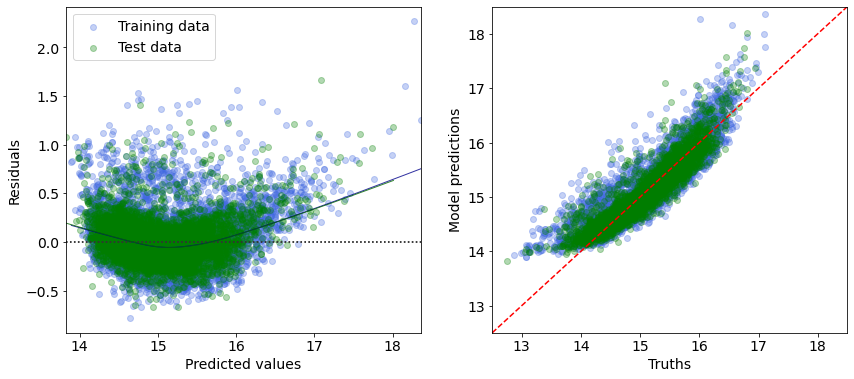

In [67]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

sns.residplot(x=y_train_pred, y=y_train_pred - y_train, lowess=True, color = 'royalblue', 
                              scatter_kws={'alpha': 0.3}, 
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8}, label='Training data')
sns.residplot(x=y_test_pred, y=y_test_pred - y_test, color = 'green', 
                              scatter_kws={'alpha': 0.3}, lowess=True,
                              line_kws={'color': 'darkgreen', 'lw': 1, 'alpha': 0.8}, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

ax = plt.subplot(1,2,2)


plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

plt.show()

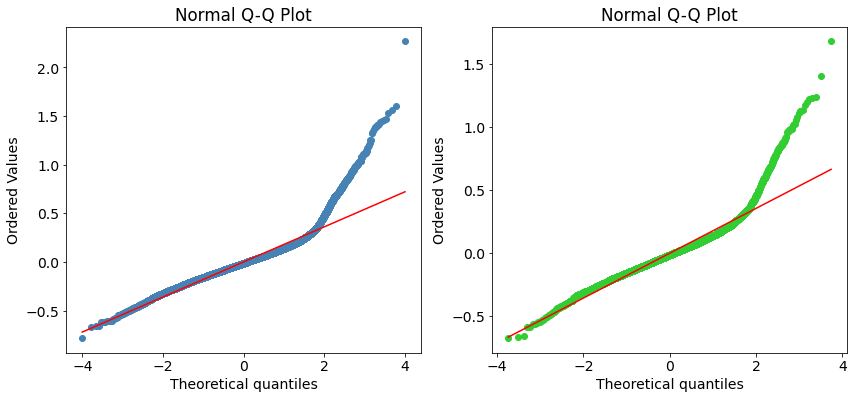

In [68]:
residuals1 = y_train_pred - y_train
residuals2 = y_test_pred - y_test

plt.rcParams['figure.figsize'] = (14, 6)
ax = plt.subplot(1,2,1)

stats.probplot(residuals1, dist=norm, plot=plt, fit=True)
ax.get_lines()[0].set_markerfacecolor('steelblue')
ax.get_lines()[0].set_markeredgecolor('steelblue')
plt.title("Normal Q-Q Plot")

ax = plt.subplot(1,2,2)

stats.probplot(residuals2, dist=norm, plot=plt, fit=True)
ax.get_lines()[0].set_markerfacecolor('limegreen')
ax.get_lines()[0].set_markeredgecolor('limegreen')
plt.title("Normal Q-Q Plot")
plt.show()

<AxesSubplot:>

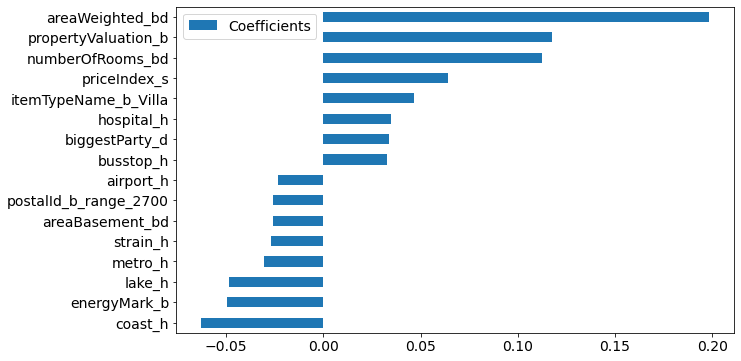

In [69]:
feature_names = np.array(X.columns)
coefs = pd.DataFrame(
    pipe.named_steps['regressor'].coef_,
    columns=['Coefficients'], index=feature_names
)


imp_coef = pd.concat([coefs.sort_values(by=['Coefficients']).head(8),
                     coefs.sort_values(by=['Coefficients']).tail(8)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")

In [70]:
coefs['Coefficients_abs'] = np.abs(coefs['Coefficients'])
coefs.sort_values(by=['Coefficients_abs'])

,Coefficients,Coefficients_abs
rebuildYear_bd,-0.000040,0.000040
postalId_b_range_2100,0.000183,0.000183
outerwall_d_Metal,0.000308,0.000308
outerwall_d_Glas,-0.000474,0.000474
postalId_b_range_2150,0.000517,0.000517
roof_d_Fibercement uden asbest,0.000815,0.000815
OMXC20_s,-0.000843,0.000843
roof_d_Glas,0.001015,0.001015
heating_d_Ovn til fast og flydende brændsel,-0.001138,0.001138
postalId_b_range_1450-1500,-0.001359,0.001359


In [71]:

fit = sm.OLS(y_train,X_train).fit()

p_values = pd.DataFrame(fit.pvalues, columns=['p values'])
p_values.sort_values(by=['p values'], ascending=False, inplace=True)
p_values['p values'] = p_values['p values'].round(4)
p_values

,p values
rebuildYear_bd,0.9942
postalId_b_range_2100,0.9799
outerwall_d_Metal,0.8673
postalId_b_range_2150,0.8262
postalId_b_range_2500,0.8206
quarter0_b,0.8117
outerwall_d_Glas,0.7993
junction_h,0.7425
postalId_b_range_2450,0.7074
heating_d_Ovn til fast og flydende brændsel,0.6462


In [72]:
coefs = pd.concat([coefs, p_values], axis=1)

In [73]:
coefs.drop(columns=['Coefficients'], inplace=True)

In [74]:
print(coefs.sort_values(by=['Coefficients_abs']).head(10).to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &  Coefficients\_abs &  p values \\
\midrule
rebuildYear\_bd                              &          0.000040 &    0.9942 \\
postalId\_b\_range\_2100                       &          0.000183 &    0.9799 \\
outerwall\_d\_Metal                           &          0.000308 &    0.8673 \\
outerwall\_d\_Glas                            &          0.000474 &    0.7993 \\
postalId\_b\_range\_2150                       &          0.000517 &    0.8262 \\
roof\_d\_Fibercement uden asbest              &          0.000815 &    0.5977 \\
OMXC20\_s                                    &          0.000843 &    0.6131 \\
roof\_d\_Glas                                 &          0.001015 &    0.6126 \\
heating\_d\_Ovn til fast og flydende brændsel &          0.001138 &    0.6462 \\
postalId\_b\_range\_1450-1500                  &          0.001359 &    0.3875 \\
\bottomrule
\end{tabular}



In [75]:
len(coefs.loc[coefs['p values']>0.05])

33

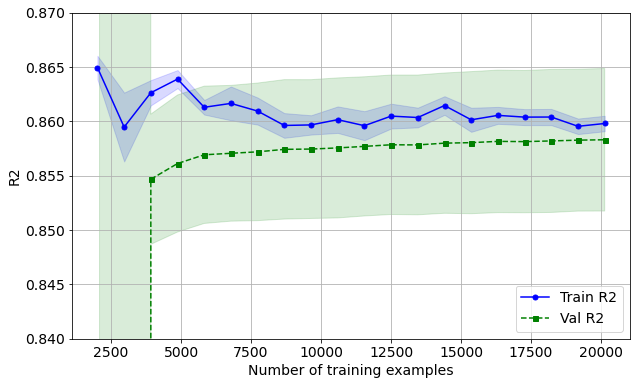

In [76]:
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 20),
                                                        cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Train R2')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Val R2')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.ylim([0.84,0.87])
plt.show()

In [77]:
results1 = pd.DataFrame({'MSE, train' : [(mean_squared_error(y_train, y_train_pred))],
                        'MAE, train' : (mean_absolute_error(y_train, y_train_pred)),
                        'R^2, train' : (r2_score(y_train, y_train_pred)),
                        'MSE, test' : (mean_squared_error(y_test, y_test_pred)),
                        'MAE, test' : (mean_absolute_error(y_test, y_test_pred)),
                        'R^2, test' : (r2_score(y_test, y_test_pred))},
                        index = ['OLS'])

In [78]:
print(results1.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
OLS &     0.03586 &    0.132177 &     0.85974 &   0.034578 &   0.131064 &   0.863186 \\
\bottomrule
\end{tabular}



In [79]:
mean_percent = np.mean(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100

median_percent = np.median(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100


In [80]:
def within15(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 15]) / len(dataset)) *100

In [81]:
dev1 = pd.DataFrame({'Mean deviation %' : [mean_percent],
                    'Median deviation %' : [median_percent],
                    'Within 15 %': [within15(y_test_pred, y_test)]},
                        index = ['OLS'])

In [82]:
print(dev1.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
OLS &             13.85 &                9.77 &        69.33 \\
\bottomrule
\end{tabular}



In [83]:
#Lasso

#https://scikit-learn.org/stable/modules/linear_model.html#lasso

EPSILON = 1e-4

#Here have to do manual standard scaling, LassoCV does not really work in pipeline

scaler = StandardScaler()
scaler.fit(X)
X_train_trans = scaler.transform(X_train)

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X_train_trans, y_train)
t_lasso_cv = time.time() - t1



Computing regularization path using the coordinate descent lasso...


In [84]:
model.alpha_

0.0004357037621602446

In [85]:

pipe2 = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(max_iter=10000))
        ])

param_range = [ 0.00001, 0.0001, 0.001, 0.01, 0.1,]


train_scores, test_scores = validation_curve(pipe2, X_train, y_train,
                                                        param_name='regressor__alpha',
                                                        param_range=param_range,
                                                        cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



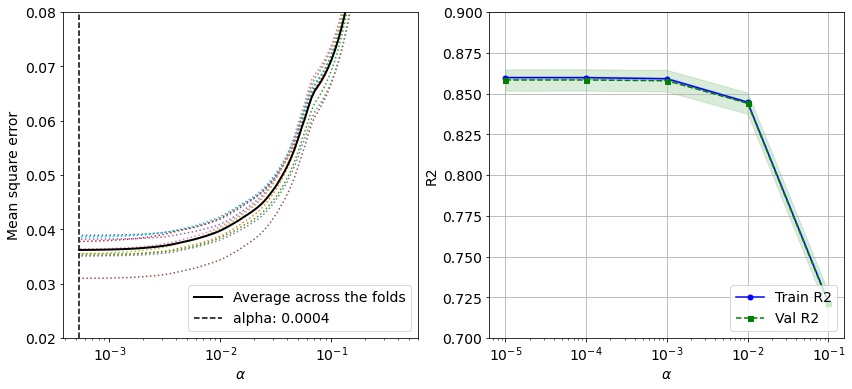

In [86]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

ymin, ymax = 0.02, 0.08
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: 0.0004')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
#plt.title('Mean square error on each fold: coordinate descent '
#          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

ax = plt.subplot(1,2,2)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Train R2')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Val R2')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.ylim([0.7,0.9])
plt.show()

<AxesSubplot:>

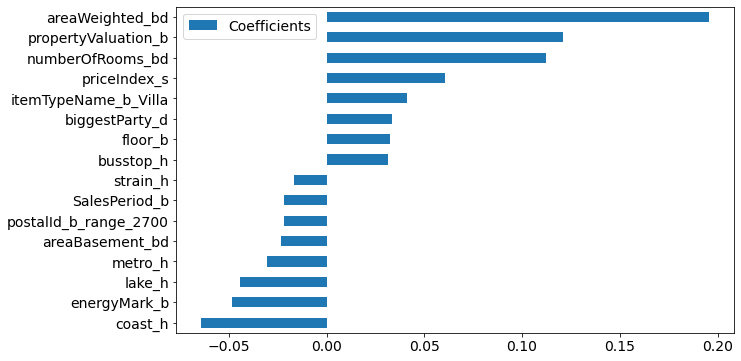

In [88]:
coefs2 = pd.DataFrame(
    model.coef_,
    columns=['Coefficients'], index=feature_names
)


imp_coef = pd.concat([coefs2.sort_values(by=['Coefficients']).head(8),
                     coefs2.sort_values(by=['Coefficients']).tail(8)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")

In [90]:
coefs2['Coefficients_abs'] = np.abs(coefs2['Coefficients'])
coefs2.sort_values(by=['Coefficients_abs'])

,Coefficients,Coefficients_abs
salesYear_b,0.000000,0.000000
heating_d_Elvarme,0.000000,0.000000
train_h,-0.000000,0.000000
OMXC20_s,0.000000,0.000000
rebuildYear_bd,-0.000000,0.000000
postalId_b_range_2100,-0.000000,0.000000
postalId_b_range_2150,-0.000000,0.000000
airport_h,-0.000000,0.000000
outerwall_d_Glas,0.000000,0.000000
postalId_b_range_2450,0.000000,0.000000


In [91]:
coefs.rename(columns = {'Coefficients_abs' : 'OLS'}, inplace = True)
coefs.drop(columns=['p values'], inplace=True)

In [93]:
coefs2.rename(columns = {'Coefficients_abs' : 'Lasso'}, inplace = True)
coefs2.drop(columns=['Coefficients'], inplace=True)

In [95]:
coefs3 = pd.concat([coefs, coefs2], axis=1)
print(coefs3.sort_values(by=['OLS']).head(10).to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &       OLS &     Lasso \\
\midrule
rebuildYear\_bd                              &  0.000040 &  0.000000 \\
postalId\_b\_range\_2100                       &  0.000183 &  0.000000 \\
outerwall\_d\_Metal                           &  0.000308 &  0.000159 \\
outerwall\_d\_Glas                            &  0.000474 &  0.000000 \\
postalId\_b\_range\_2150                       &  0.000517 &  0.000000 \\
roof\_d\_Fibercement uden asbest              &  0.000815 &  0.001216 \\
OMXC20\_s                                    &  0.000843 &  0.000000 \\
roof\_d\_Glas                                 &  0.001015 &  0.000575 \\
heating\_d\_Ovn til fast og flydende brændsel &  0.001138 &  0.002160 \\
postalId\_b\_range\_1450-1500                  &  0.001359 &  0.000136 \\
\bottomrule
\end{tabular}



In [97]:
len(coefs3.loc[coefs3['Lasso']<0.00001])

10

In [98]:
X_test_trans = scaler.transform(X_test)

y_train_pred = model.predict(X_train_trans)
y_test_pred = model.predict(X_test_trans)

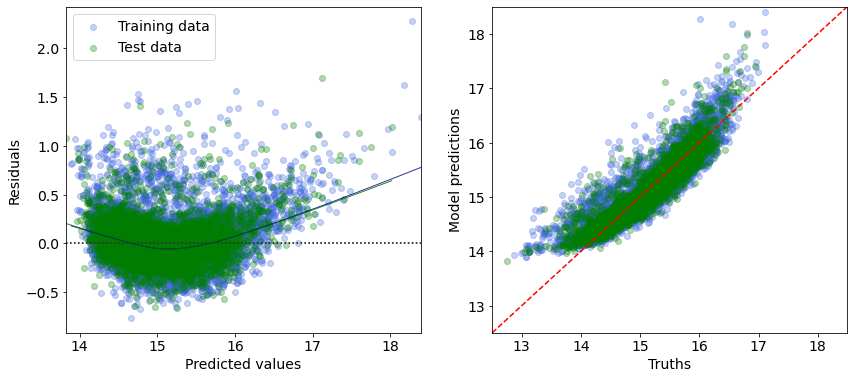

In [99]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

sns.residplot(x=y_train_pred, y=y_train_pred - y_train, lowess=True, color = 'royalblue', 
                              scatter_kws={'alpha': 0.3}, 
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8}, label='Training data')
sns.residplot(x=y_test_pred, y=y_test_pred - y_test, color = 'green', 
                              scatter_kws={'alpha': 0.3}, lowess=True,
                              line_kws={'color': 'darkgreen', 'lw': 1, 'alpha': 0.8}, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

ax = plt.subplot(1,2,2)


plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

plt.show()

In [100]:
results2 = pd.DataFrame({'MSE, train' : [(mean_squared_error(y_train, y_train_pred))],
                        'MAE, train' : (mean_absolute_error(y_train, y_train_pred)),
                        'R^2, train' : (r2_score(y_train, y_train_pred)),
                        'MSE, test' : (mean_squared_error(y_test, y_test_pred)),
                        'MAE, test' : (mean_absolute_error(y_test, y_test_pred)),
                        'R^2, test' : (r2_score(y_test, y_test_pred))},
                        index = ['Lasso'])

print(results2.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
Lasso &    0.035914 &     0.13242 &     0.85953 &   0.034576 &   0.131123 &   0.863192 \\
\bottomrule
\end{tabular}



In [101]:
mean_percent = np.mean(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100

median_percent = np.median(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100


def within15(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 15]) / len(dataset)) *100

dev2 = pd.DataFrame({'Mean deviation %' : [mean_percent],
                    'Median deviation %' : [median_percent],
                    'Within 15 %': [within15(y_test_pred, y_test)]},
                        index = ['Lasso'])

print(dev2.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
Lasso &             13.86 &                9.77 &         69.4 \\
\bottomrule
\end{tabular}



In [102]:
# Including payment Cash
X = finalDataLog.drop(['salePrice_b', 'log_salePrice_b',  'AVM_pris_d'], axis = 1)
y = finalDataLog['log_salePrice_b']


X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)


In [103]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

pipe = pipe.fit(X_train, y_train)

In [104]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

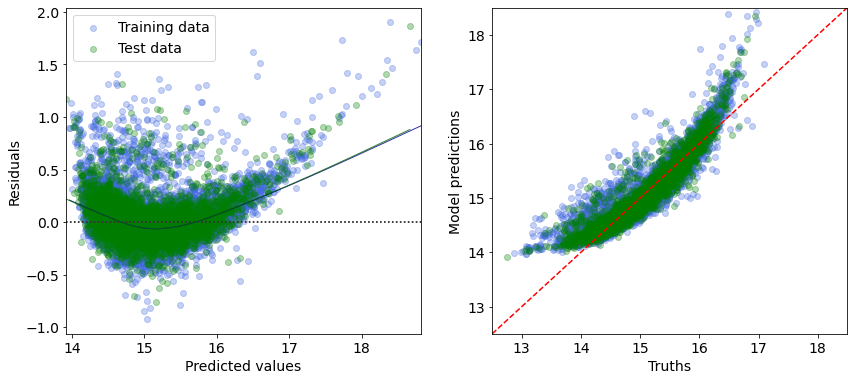

In [114]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

sns.residplot(x=y_train_pred, y=y_train_pred - y_train, lowess=True, color = 'royalblue', 
                              scatter_kws={'alpha': 0.3}, 
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8}, label='Training data')
sns.residplot(x=y_test_pred, y=y_test_pred - y_test, color = 'green', 
                              scatter_kws={'alpha': 0.3}, lowess=True,
                              line_kws={'color': 'darkgreen', 'lw': 1, 'alpha': 0.8}, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

ax = plt.subplot(1,2,2)


plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

plt.show()

<AxesSubplot:>

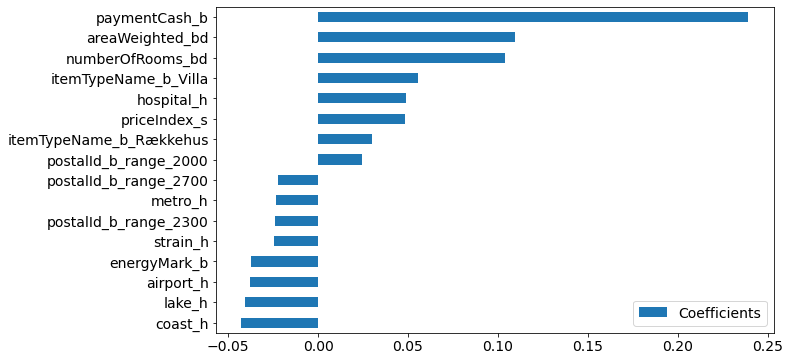

In [113]:
feature_names = np.array(X.columns)
coefs = pd.DataFrame(
    pipe.named_steps['regressor'].coef_,
    columns=['Coefficients'], index=feature_names
)


imp_coef = pd.concat([coefs.sort_values(by=['Coefficients']).head(8),
                     coefs.sort_values(by=['Coefficients']).tail(8)])


imp_coef.plot(kind = "barh")



In [115]:
results4 = pd.DataFrame({'MSE, train' : [(mean_squared_error(y_train, y_train_pred))],
                        'MAE, train' : (mean_absolute_error(y_train, y_train_pred)),
                        'R^2, train' : (r2_score(y_train, y_train_pred)),
                        'MSE, test' : (mean_squared_error(y_test, y_test_pred)),
                        'MAE, test' : (mean_absolute_error(y_test, y_test_pred)),
                        'R^2, test' : (r2_score(y_test, y_test_pred))},
                        index = ['OLS Cash'])

print(results4.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
OLS Cash &    0.028795 &    0.113101 &    0.887376 &    0.02686 &   0.112086 &   0.893722 \\
\bottomrule
\end{tabular}



In [116]:
mean_percent = np.mean(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100

median_percent = np.median(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100


def within15(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 15]) / len(dataset)) *100

dev4 = pd.DataFrame({'Mean deviation %' : [mean_percent],
                    'Median deviation %' : [median_percent],
                    'Within 15 %': [within15(y_test_pred, y_test)]},
                        index = ['OLS Cash'])

print(dev4.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
OLS Cash &             11.88 &                8.17 &        77.45 \\
\bottomrule
\end{tabular}



In [117]:
# If just uses payment cash to predict 

y_train_pred = np.log(X_train['paymentCash_b'])
y_test_pred = np.log(X_test['paymentCash_b'])

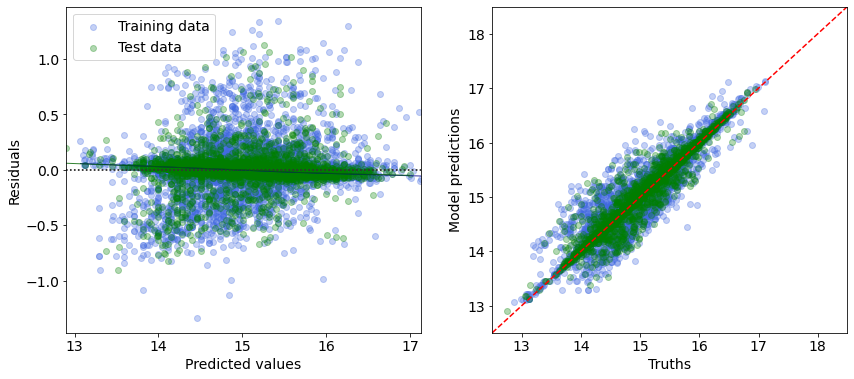

In [118]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

sns.residplot(x=y_train_pred, y=y_train_pred - y_train, lowess=True, color = 'royalblue', 
                              scatter_kws={'alpha': 0.3}, 
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8}, label='Training data')
sns.residplot(x=y_test_pred, y=y_test_pred - y_test, color = 'green', 
                              scatter_kws={'alpha': 0.3}, lowess=True,
                              line_kws={'color': 'darkgreen', 'lw': 1, 'alpha': 0.8}, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

ax = plt.subplot(1,2,2)


plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

plt.show()

In [119]:
results6 = pd.DataFrame({'MSE, train' : [(mean_squared_error(y_train, y_train_pred))],
                        'MAE, train' : (mean_absolute_error(y_train, y_train_pred)),
                        'R^2, train' : (r2_score(y_train, y_train_pred)),
                        'MSE, test' : (mean_squared_error(y_test, y_test_pred)),
                        'MAE, test' : (mean_absolute_error(y_test, y_test_pred)),
                        'R^2, test' : (r2_score(y_test, y_test_pred))},
                        index = ['Cash'])

print(results6.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
Cash &    0.015461 &    0.052441 &    0.939527 &   0.013447 &   0.050565 &   0.946794 \\
\bottomrule
\end{tabular}



In [120]:
mean_percent = np.mean(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100

median_percent = np.median(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100


def within15(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 15]) / len(dataset)) *100

dev6 = pd.DataFrame({'Mean deviation %' : [mean_percent],
                    'Median deviation %' : [median_percent],
                    'Within 15 %': [within15(y_test_pred, y_test)]},
                        index = ['Cash'])

print(dev6.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
Cash &               5.3 &                2.41 &        92.89 \\
\bottomrule
\end{tabular}



In [121]:
# AVM price as predictor

#https://geomatic.dk/dk/services/data-lake/ejendomsvaerdimodel-avm/

X = finalDataLog.drop(['salePrice_b', 'log_salePrice_b', 'paymentCash_b'], axis = 1)
y = finalDataLog['log_salePrice_b']


X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [122]:
df_train = X_train[['AVM_pris_d']].join(y_train)
df_test = X_test[['AVM_pris_d']].join(y_test)

In [123]:
df_train['log_AVM_pris_d']=np.log(df_train['AVM_pris_d'])
df_test['log_AVM_pris_d']=np.log(df_test['AVM_pris_d'])

/Users/frederikmadsen/PycharmProjects/Thesis/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [124]:
df_train.dropna(subset = ['log_AVM_pris_d'], inplace=True)
df_test.dropna(subset = ['log_AVM_pris_d'], inplace=True)
df_train = df_train.loc[(df_train['log_AVM_pris_d']>0) & (df_train['log_AVM_pris_d']<100),]
df_test = df_test.loc[(df_test['log_AVM_pris_d']>0) & (df_test['log_AVM_pris_d']<100),]

In [125]:
print(len(X_train))
print(len(X_test))
print(len(df_train))
print(len(df_test))

22372
7458
19202
6400


In [126]:
y_train = df_train['log_salePrice_b']
y_test = df_test['log_salePrice_b']
y_train_pred = df_train['log_AVM_pris_d']
y_test_pred = df_test['log_AVM_pris_d']

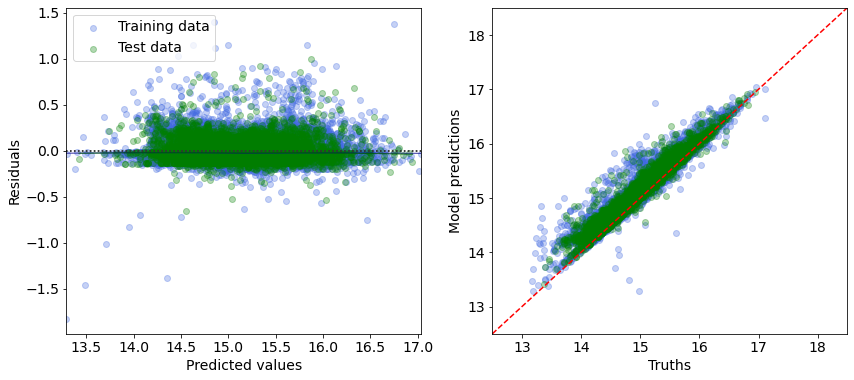

In [127]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

sns.residplot(x=y_train_pred, y=y_train_pred - y_train, lowess=True, color = 'royalblue', 
                              scatter_kws={'alpha': 0.3}, 
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8}, label='Training data')
sns.residplot(x=y_test_pred, y=y_test_pred - y_test, color = 'green', 
                              scatter_kws={'alpha': 0.3}, lowess=True,
                              line_kws={'color': 'darkgreen', 'lw': 1, 'alpha': 0.8}, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

ax = plt.subplot(1,2,2)


plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

plt.show()

In [128]:
results7 = pd.DataFrame({'MSE, train' : [(mean_squared_error(y_train, y_train_pred))],
                        'MAE, train' : (mean_absolute_error(y_train, y_train_pred)),
                        'R^2, train' : (r2_score(y_train, y_train_pred)),
                        'MSE, test' : (mean_squared_error(y_test, y_test_pred)),
                        'MAE, test' : (mean_absolute_error(y_test, y_test_pred)),
                        'R^2, test' : (r2_score(y_test, y_test_pred))},
                        index = ['AVM'])

print(results7.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
AVM &    0.031669 &    0.136752 &    0.870476 &   0.030802 &    0.13764 &   0.871138 \\
\bottomrule
\end{tabular}



In [129]:
mean_percent = np.mean(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100

median_percent = np.median(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100


def within15(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 15]) / len(dataset)) *100

dev7 = pd.DataFrame({'Mean deviation %' : [mean_percent],
                    'Median deviation %' : [median_percent],
                    'Within 15 %': [within15(y_test_pred, y_test)]},
                        index = ['AVM'])

print(dev7.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
AVM &             15.48 &               12.06 &        69.42 \\
\bottomrule
\end{tabular}



<Figure size 1008x432 with 0 Axes>

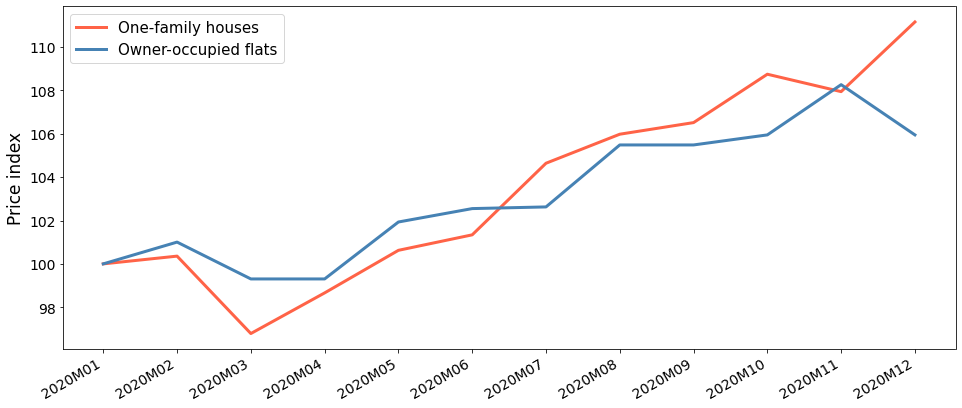

In [140]:
# Corona split



price_index = pd.read_csv('salePriceIndex.csv', delimiter=',', header=1, skiprows=1)
price_index.drop(price_index.columns[[0, 1]], axis = 1, inplace = True)
price_index = price_index.drop([0, 1]).T
price_index = price_index.rename(columns=price_index.iloc[0]).drop(price_index.index[0:1])
price_index['One-family houses'] = price_index['One-family houses'] * 100 / price_index.loc['2020M01','One-family houses']
price_index['Owner-occupied flats, total'] = price_index['Owner-occupied flats, total'] * 100 / price_index.loc['2020M01','Owner-occupied flats, total']

plt.figure(figsize = (14, 6))

fig, ax = plt.subplots()
plt.plot(price_index.loc['2020M01':'2020M12','One-family houses'], c ='tomato', linewidth=3, label='One-family houses')
plt.plot(price_index.loc['2020M01':'2020M12','Owner-occupied flats, total'], c ='steelblue', linewidth=3, label='Owner-occupied flats')

fig.autofmt_xdate()
plt.ylabel('Price index')
plt.legend(fontsize=15)
plt.rc('axes', labelsize=17)


plt.show()


In [160]:
finalDataLog_corona = shuffle(finalDataLog, random_state=0)

finalDataLog_2020 = finalDataLog_corona.loc[finalDataLog['salesYear_b'] == 2020,]
finalDataLog_x = finalDataLog_corona.loc[~(finalDataLog['salesYear_b'] == 2020),]

In [161]:

X_train = finalDataLog_x.drop(['salePrice_b', 'log_salePrice_b', 'paymentCash_b',  'AVM_pris_d'], axis = 1)
y_train = finalDataLog_x['log_salePrice_b']
X_test = finalDataLog_2020.drop(['salePrice_b', 'log_salePrice_b', 'paymentCash_b',  'AVM_pris_d'], axis = 1)
y_test = finalDataLog_2020['log_salePrice_b']


In [162]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

pipe = pipe.fit(X_train, y_train)


In [163]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

corona_train = pd.read_csv("corona_train.csv", index_col=0)
corona_test = pd.read_csv("corona_test.csv", index_col=0)

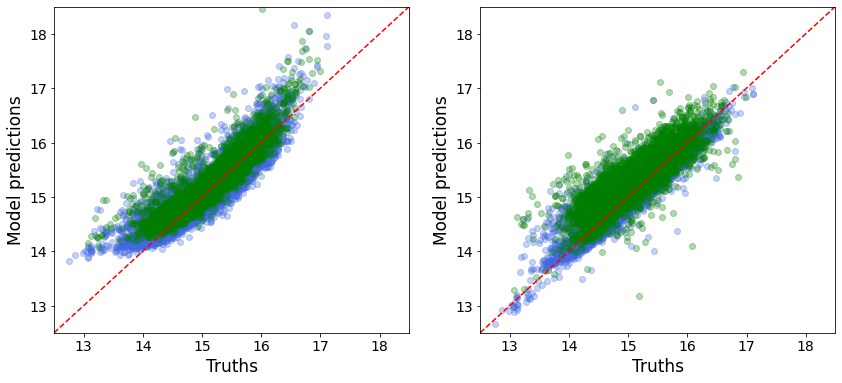

In [164]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(1,2,1)

plt.scatter(y_train, y_train_pred, alpha=0.3, c = 'royalblue')
plt.scatter(y_test, y_test_pred, alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

ax = plt.subplot(1,2,2)

plt.scatter(corona_train['y_train_C'], corona_train['y_train_pred_C'], alpha=0.3, c = 'royalblue')
plt.scatter(corona_test['y_test_C'], corona_test['y_test_pred_C'], alpha=0.3, c = 'green')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([12.5, 18.5])
plt.ylim([12.5, 18.5])

plt.show()

<AxesSubplot:>

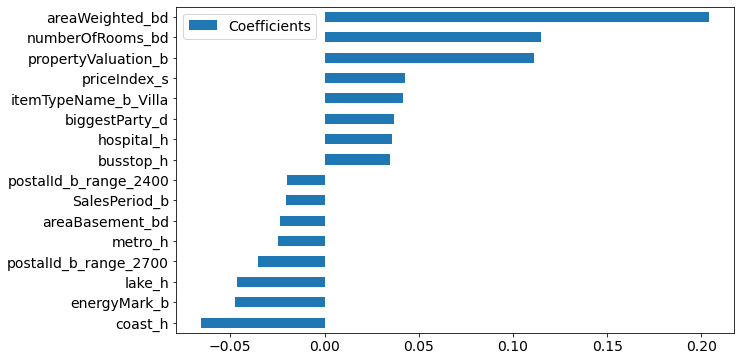

In [165]:
feature_names = np.array(X_train.columns)
coefs = pd.DataFrame(
    pipe.named_steps['regressor'].coef_,
    columns=['Coefficients'], index=feature_names
)


imp_coef = pd.concat([coefs.sort_values(by=['Coefficients']).head(8),
                     coefs.sort_values(by=['Coefficients']).tail(8)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")

In [166]:
results8 = pd.DataFrame({'MSE, train' : [(mean_squared_error(y_train, y_train_pred))],
                        'MAE, train' : (mean_absolute_error(y_train, y_train_pred)),
                        'R^2, train' : (r2_score(y_train, y_train_pred)),
                        'MSE, test' : (mean_squared_error(y_test, y_test_pred)),
                        'MAE, test' : (mean_absolute_error(y_test, y_test_pred)),
                        'R^2, test' : (r2_score(y_test, y_test_pred))},
                        index = ['OLS Corona'])

print(results8.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
OLS Corona &     0.03459 &    0.130212 &    0.864049 &   0.062002 &   0.185362 &    0.75353 \\
\bottomrule
\end{tabular}



In [167]:
mean_percent = np.mean(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100

median_percent = np.median(abs(np.exp(y_test)-np.exp(y_test_pred))/np.exp(y_test))*100


def within15(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 15]) / len(dataset)) *100

dev8 = pd.DataFrame({'Mean deviation %' : [mean_percent],
                    'Median deviation %' : [median_percent],
                    'Within 15 %': [within15(y_test_pred, y_test)]},
                        index = ['OLS Corona'])

print(dev8.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
OLS Corona &              22.0 &               16.03 &        47.22 \\
\bottomrule
\end{tabular}



In [169]:
results9 = pd.read_csv("results9.csv", index_col=0)
dev9 = pd.read_csv("dev9.csv", index_col=0)

In [170]:
corona_results = pd.concat([results8, results9])
corona_dev = pd.concat([dev8, dev9])

In [172]:
print(corona_results.round(3).to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
OLS Corona &       0.035 &        0.13 &       0.864 &      0.062 &      0.185 &      0.754 \\
NN Corona  &       0.019 &        0.09 &       0.927 &      0.133 &      0.287 &      0.470 \\
\bottomrule
\end{tabular}



In [173]:
print(corona_dev.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
OLS Corona &             22.00 &               16.03 &        47.22 \\
NN Corona  &             36.18 &               27.22 &        33.11 \\
\bottomrule
\end{tabular}



In [153]:
results3

,Unnamed: 0,"MSE, train","MAE, train","R^2, train","MSE, test","MAE, test","R^2, test"
0,NN,0.020428,0.088891,0.920101,0.027891,0.103964,0.889642


In [154]:
# Results

results3 = pd.read_csv("results3.csv", index_col=0)
results5 = pd.read_csv("results5.csv", index_col=0)
dev3 = pd.read_csv("dev3.csv", index_col=0)
dev5 = pd.read_csv("dev5.csv", index_col=0)

In [155]:
results = pd.concat([results1, results2, results3, results4, results5, results6, results7])
dev = pd.concat([dev1, dev2, dev3, dev4, dev5, dev6, dev7])

In [159]:
print(results.round(3).to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  MSE, train &  MAE, train &  R\textasciicircum 2, train &  MSE, test &  MAE, test &  R\textasciicircum 2, test \\
\midrule
OLS      &       0.036 &       0.132 &       0.860 &      0.035 &      0.131 &      0.863 \\
Lasso    &       0.036 &       0.132 &       0.860 &      0.035 &      0.131 &      0.863 \\
NN       &       0.020 &       0.089 &       0.920 &      0.028 &      0.104 &      0.890 \\
OLS Cash &       0.029 &       0.113 &       0.887 &      0.027 &      0.112 &      0.894 \\
NN Cash  &       0.012 &       0.054 &       0.954 &      0.014 &      0.060 &      0.944 \\
Cash     &       0.015 &       0.052 &       0.940 &      0.013 &      0.051 &      0.947 \\
AVM      &       0.032 &       0.137 &       0.870 &      0.031 &      0.138 &      0.871 \\
\bottomrule
\end{tabular}



In [158]:
print(dev.round(2).to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Mean deviation \% &  Median deviation \% &  Within 15 \% \\
\midrule
OLS      &             13.85 &                9.77 &        69.33 \\
Lasso    &             13.86 &                9.77 &        69.40 \\
NN       &             11.08 &                7.16 &        80.73 \\
OLS Cash &             11.88 &                8.17 &        77.45 \\
NN Cash  &              6.35 &                3.23 &        92.12 \\
Cash     &              5.30 &                2.41 &        92.89 \\
AVM      &             15.48 &               12.06 &        69.42 \\
\bottomrule
\end{tabular}

